In [0]:
import numpy as np
import matplotlib.pyplot as plt
import time
import warnings
from skimage import filters
from skimage import restoration
import scipy.ndimage
from google.colab import drive

%matplotlib inline

In [2]:
warnings.filterwarnings('ignore')
drive.mount('/content/gdrive')
from google.colab import files
uploaded = files.upload()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Saving proba_original.jpeg to proba_original (3).jpeg
Saving proba_noisy.jpeg to proba_noisy (3).jpeg
Saving cameraman_original.jpeg to cameraman_original (3).jpeg
Saving cameraman_noisy.jpeg to cameraman_noisy (3).jpeg
Saving balloons_original.png to balloons_original (3).png
Saving balloons_noisy.jpeg to balloons_noisy (3).jpeg


In [0]:
data = scipy.ndimage.imread("cameraman_noisy.jpeg", mode='L')
golden_data = scipy.ndimage.imread("cameraman_original.jpeg", mode='L')

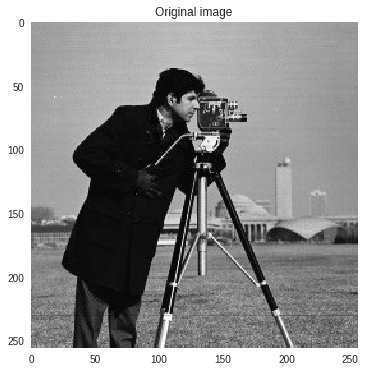

In [15]:
plt.rcParams['figure.figsize'] = [12, 6]
fig, ax = plt.subplots()
ax.grid(False)
plt.title("Original image")
plt.imshow(golden_data, cmap=plt.cm.gray, interpolation='nearest')

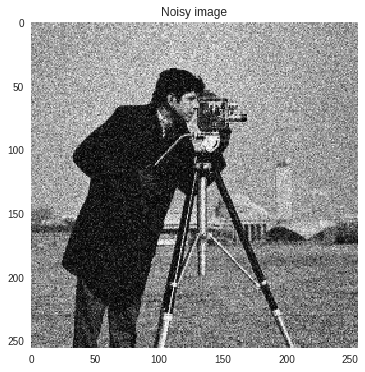

In [16]:
fig, ax = plt.subplots()
ax.grid(False)
plt.title("Noisy image")
plt.imshow(data, cmap=plt.cm.gray, interpolation='nearest')


In [0]:
def psnr(img1, img2):
    mse = np.mean( (img1 - img2) ** 2 )
    if mse == 0:
        return 100
    PIXEL_MAX = 255.0
    return 20 * np.log10(PIXEL_MAX / np.sqrt(mse))

In [0]:
start = time.time()
gaussian_filter_result = filters.gaussian(data, sigma=2)
med_filter_result = filters.median(data, np.ones((3, 3)))
tv_filter_result = restoration.denoise_tv_chambolle(data, weight=0.1)
end = time.time()

Text(0.5, 1.0, 'Gaussian filter result')

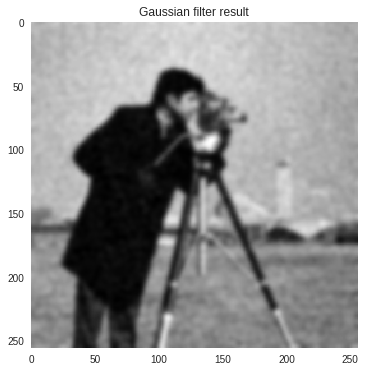

In [19]:
fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(gaussian_filter_result, cmap=plt.cm.gray, interpolation='nearest')
plt.title("Gaussian filter result")

In [20]:
gaussian_difference = gaussian_filter_result - golden_data
print("Frobenius distance    ", np.linalg.norm(gaussian_difference))
print("Time for calculation  ", end-start)
print("PSNR                  ", psnr(golden_data, gaussian_filter_result))

Frobenius distance     34220.64790915432
Time for calculation   0.09186029434204102
PSNR                   5.609838356865474


Text(0.5, 1.0, 'Median filter result')

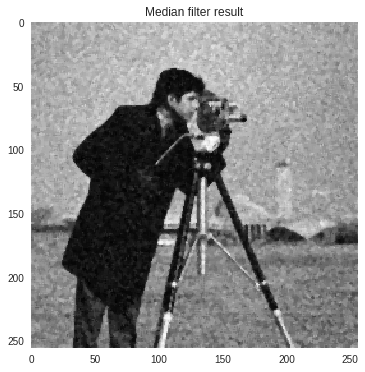

In [21]:
fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(med_filter_result, cmap=plt.cm.gray, interpolation='nearest')
plt.title("Median filter result")

In [22]:
median_difference = med_filter_result - golden_data
print("Frobenius distance    ", np.linalg.norm(median_difference))
print("Time for calculation  ", end-start)
print("PSNR                  ", psnr(golden_data, med_filter_result))

Frobenius distance     40698.02506264892
Time for calculation   0.09186029434204102
PSNR                   29.49174370202553


Text(0.5, 1.0, 'Total variation result')

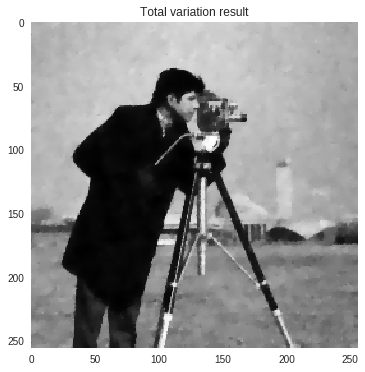

In [23]:
fig, ax = plt.subplots()
ax.grid(False)
ax.imshow(tv_filter_result, cmap=plt.cm.gray, interpolation='nearest')
plt.title("Total variation result")

In [24]:
tv_difference = tv_filter_result - golden_data
print("Frobenius distance    ", np.linalg.norm(tv_difference))
print("Time for calculation  ", end-start)
print("PSNR                  ", psnr(golden_data, tv_filter_result))

Frobenius distance     34218.726810809494
Time for calculation   0.09186029434204102
PSNR                   5.6103259840035005
